In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import numpy as np
import shap

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Leitura dos dados

Abaixo está sendo feita a leitura dos dados do [PNAD](https://www.ibge.gov.br/estatisticas/sociais/educacao/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=o-que-e) de 2015 obtidos [aqui](http://centrodametropole.fflch.usp.br/pt-br/download-de-dados?f%5B0%5D=facets_temas%3Apnad). Junto com os dados do PNAD está disponível um dicionário das variáveis em `Dicionários e input/Dicionário de variáveis de pessoas - PNAD 2015.xls`.

In [2]:
df = pd.read_csv('pnad.pes_2015.csv', sep='\t')
print(df.shape)
df.head()

(356904, 436)


,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,V0402,V0403,V0404,V0405,V0406,V0407,V0408,V4111,V4112,V4011,V0412,V0501,V0502,V5030,V0504,V0505,V5061,V5062,V5063,V5064,V5065,V0507,V5080,V5090,V0510,V0511,V5121,V5122,V5123,V5124,V5125,V5126,V0601,V0602,V6002,V6020,V6003,V6030,V0604,V0605,V0606,V6007,V6070,V0608,V0609,V0610,V0611,V06111,V061111,V061112,V061113,V061114,V061115,V061116,V06112,V0612,V0701,V0702,V0703,V0704,V0705,V7060,V7070,V0708,V7090,V7100,V0711,V7121,V7122,V7124,V7125,V7127,V7128,V0713,V0714,V0715,V0716,V9001,V9002,V9003,V9004,V9005,V9906,V9907,V9008,V9009,V9010,V90101,V9011,V9012,V90121,V9013,V9014,V9151,V9152,V9154,V9156,V9157,V9159,V9161,V9162,V9164,V9016,V9017,V9018,V9019,V9201,V9202,V9204,V9206,V9207,V9209,V9211,V9212,V9214,V9021,V9022,V9023,V9024,V9025,V9026,V9027,V9028,V9029,V9030,V9031,V9032,V9033,V9034,V9035,V9036,V9037,V9038,V9039,V9040,V9041,V9042,V9043,V9044,V9045,V9046,V9047,V9048,V9049,V9050,V9051,V9052,V9531,V9532,V9534,V9535,V9537,V90531,V90532,V90533,V9054,V9055,V9056,V9057,V9058,V9059,V9060,V9611,V9612,V9062,V9063,V9064,V9065,V9066,V9067,V9068,V9069,V9070,V9971,V9972,V9073,V9074,V9075,V9076,V9077,V9078,V9079,V9080,V9081,V9082,V9083,V9084,V9085,V9861,V9862,V9087,V90871,V908721,V908722,V908723,V908724,V908725,V908726,V90873,V90874,V9088,V90881,V90882,V908831,V908832,V908833,V908834,V908835,V908836,V908837,V90884,V908851,V908852,V908853,V908854,V908855,V908856,V90886,V90887,V908881,V908882,V908883,V908884,V908885,V908886,V908887,V9891,V9892,V9990,V9991,V9092,V9093,V9094,V9095,V9096,V9097,V9981,V9982,V9984,V9985,V9987,V9099,V9100,V9101,V1021,V1022,V1024,V1025,V1027,V1028,V9103,V9104,V9105,V9106,V9107,V9108,V1091,V1092,V9910,V9911,V9112,V9113,V9114,V9115,V9116,V9117,V9118,V9119,V9120,V9121,V9921,V9122,V9123,V9124,V1251,V1252,V1254,V1255,V1257,V1258,V1260,V1261,V1263,V1264,V1266,V1267,V1269,V1270,V1272,V1273,V9126,V1101,V1141,V1142,V1151,V1152,V1153,V1154,V1161,V1162,V1163,V1164,V1107,V1181,V1182,V1109,V1110,V1111,V1112,V1113,V1114,V1115,V4801,V4802,V4803,V4704,V4805,V4706,V4707,V4808,V4809,V4810,V4711,V4812,V4713,V4814,V4715,V4816,V4817,V4718,V4719,V4720,V4721,V4722,V4723,V4724,V4727,V4728,V4729,V4732,V4735,V4838,V6502,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V38011,V38012,V3802,V3803,V3804,V3805,V3806,V3807,V3808,V3809,V37001,V37002,V3701,V3702,V3703,V3704,V3705,V3706,V37071,V37072,V37073,V37074,V37075,V37091,V37092,V37093,V37094,V37095,V37096,V37097,V37098,V3719,V3720,V36001,V36002,V3601,V3602,V3603,V3604,V3605,V3606,V3607,V3608,V3609,V3610,V3611,V3612,V3613,V3614,V3615,V3616,V3617,V3618,V3619,V3620,V3621,V3622,V3623,V3624,V3625,V3626,V3627,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993,domicilioid
0,2015,11,11000015,1,1,2,27,2,1992,23,1,1,1,8.0,1,4.0,NaN,2,5.0,NaN,0.0,2.0,1,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5161.0,93020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,4.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,800.0,NaN,NaN,NaN,1.0,3.0,3.0,1.0,3.0,2.0,1.0,44.0,3.0,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,3.0,4.0,NaN,4.0,1.0,30.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Pré processamentos

A variável `V4718` é o Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade, nas próximas análises iremos construir um modelo usando essa variável como target. Por isso excluiremos todos os casos em que essa variável tem valor nulo ou zero.

In [3]:
df['V4718'].describe()

count    163046.000000
mean       1669.065380
std        2709.651405
min           0.000000
25%         788.000000
50%        1000.000000
75%        1800.000000
max      200000.000000
Name: V4718, dtype: float64

In [6]:
df = df.loc[df['V4718'] > 0]
df.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,V0402,V0403,V0404,V0405,V0406,V0407,V0408,V4111,V4112,V4011,V0412,V0501,V0502,V5030,V0504,V0505,V5061,V5062,V5063,V5064,V5065,V0507,V5080,V5090,V0510,V0511,V5121,V5122,V5123,V5124,V5125,V5126,V0601,V0602,V6002,V6020,V6003,V6030,V0604,V0605,V0606,V6007,V6070,V0608,V0609,V0610,V0611,V06111,V061111,V061112,V061113,V061114,V061115,V061116,V06112,V0612,V0701,V0702,V0703,V0704,V0705,V7060,V7070,V0708,V7090,V7100,V0711,V7121,V7122,V7124,V7125,V7127,V7128,V0713,V0714,V0715,V0716,V9001,V9002,V9003,V9004,V9005,V9906,V9907,V9008,V9009,V9010,V90101,V9011,V9012,V90121,V9013,V9014,V9151,V9152,V9154,V9156,V9157,V9159,V9161,V9162,V9164,V9016,V9017,V9018,V9019,V9201,V9202,V9204,V9206,V9207,V9209,V9211,V9212,V9214,V9021,V9022,V9023,V9024,V9025,V9026,V9027,V9028,V9029,V9030,V9031,V9032,V9033,V9034,V9035,V9036,V9037,V9038,V9039,V9040,V9041,V9042,V9043,V9044,V9045,V9046,V9047,V9048,V9049,V9050,V9051,V9052,V9531,V9532,V9534,V9535,V9537,V90531,V90532,V90533,V9054,V9055,V9056,V9057,V9058,V9059,V9060,V9611,V9612,V9062,V9063,V9064,V9065,V9066,V9067,V9068,V9069,V9070,V9971,V9972,V9073,V9074,V9075,V9076,V9077,V9078,V9079,V9080,V9081,V9082,V9083,V9084,V9085,V9861,V9862,V9087,V90871,V908721,V908722,V908723,V908724,V908725,V908726,V90873,V90874,V9088,V90881,V90882,V908831,V908832,V908833,V908834,V908835,V908836,V908837,V90884,V908851,V908852,V908853,V908854,V908855,V908856,V90886,V90887,V908881,V908882,V908883,V908884,V908885,V908886,V908887,V9891,V9892,V9990,V9991,V9092,V9093,V9094,V9095,V9096,V9097,V9981,V9982,V9984,V9985,V9987,V9099,V9100,V9101,V1021,V1022,V1024,V1025,V1027,V1028,V9103,V9104,V9105,V9106,V9107,V9108,V1091,V1092,V9910,V9911,V9112,V9113,V9114,V9115,V9116,V9117,V9118,V9119,V9120,V9121,V9921,V9122,V9123,V9124,V1251,V1252,V1254,V1255,V1257,V1258,V1260,V1261,V1263,V1264,V1266,V1267,V1269,V1270,V1272,V1273,V9126,V1101,V1141,V1142,V1151,V1152,V1153,V1154,V1161,V1162,V1163,V1164,V1107,V1181,V1182,V1109,V1110,V1111,V1112,V1113,V1114,V1115,V4801,V4802,V4803,V4704,V4805,V4706,V4707,V4808,V4809,V4810,V4711,V4812,V4713,V4814,V4715,V4816,V4817,V4718,V4719,V4720,V4721,V4722,V4723,V4724,V4727,V4728,V4729,V4732,V4735,V4838,V6502,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V38011,V38012,V3802,V3803,V3804,V3805,V3806,V3807,V3808,V3809,V37001,V37002,V3701,V3702,V3703,V3704,V3705,V3706,V37071,V37072,V37073,V37074,V37075,V37091,V37092,V37093,V37094,V37095,V37096,V37097,V37098,V3719,V3720,V36001,V36002,V3601,V3602,V3603,V3604,V3605,V3606,V3607,V3608,V3609,V3610,V3611,V3612,V3613,V3614,V3615,V3616,V3617,V3618,V3619,V3620,V3621,V3622,V3623,V3624,V3625,V3626,V3627,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993,domicilioid
0,2015,11,11000015,1,1,2,27,2,1992,23,1,1,1,8.0,1,4.0,NaN,2,5.0,NaN,0.0,2.0,1,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5161.0,93020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,4.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,800.0,NaN,NaN,NaN,1.0,3.0,3.0,1.0,3.0,2.0,1.0,44.0,3.0,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,3.0,4.0,NaN,4.0,1.0,30.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Muitas colunas do dataframe têm mais 90% dos valores nulos, iremos excluir todas essas colunas.

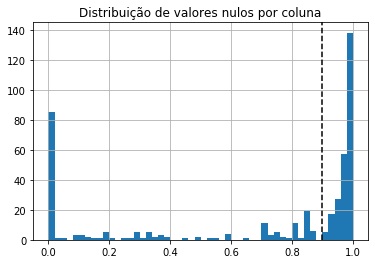

In [7]:
df_nulos = df.isnull().sum() / len(df)
df_nulos.hist(bins=50)
pl.axvline(0.9, color='k', linestyle='--')
pl.title('Distribuição de valores nulos por coluna')
pl.show()

In [8]:
print(df.shape)
df.drop(df_nulos[df_nulos > 0.9].index, axis=1, inplace=True)
print(df.shape)
df.head()

(152681, 436)
(152681, 192)


,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,V0402,V0403,V0404,V0405,V0406,V0407,V0408,V4111,V4112,V4011,V0412,V0501,V0502,V5030,V0504,V0505,V5065,V5090,V0510,V0511,V5125,V5126,V0601,V0602,V0606,V6007,V6070,V0609,V0610,V0611,V06111,V061111,V061112,V061113,V061114,V061115,V061116,V06112,V0612,V9001,V9005,V9906,V9907,V9029,V9030,V9032,V9033,V9035,V9040,V9041,V9042,V9043,V9044,V9045,V9046,V9047,V9049,V9051,V9531,V9532,V90531,V90532,V90533,V9054,V9055,V9056,V9057,V9058,V9059,V9060,V9611,V9612,V9062,V9087,V90871,V90873,V90874,V9088,V90881,V90882,V90884,V90886,V90887,V9891,V9892,V9115,V9116,V9117,V9118,V9119,V9120,V9121,V9921,V9122,V9123,V9124,V9126,V1101,V1141,V1142,V1151,V1152,V1161,V1162,V1107,V1181,V1182,V1109,V1110,V1115,V4803,V4704,V4805,V4706,V4707,V4808,V4809,V4810,V4711,V4812,V4713,V4814,V4715,V4816,V4817,V4718,V4719,V4720,V4721,V4722,V4723,V4724,V4727,V4728,V4729,V4732,V4735,V4838,V6502,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V37001,V37002,V3701,V3703,V3704,V3706,V37071,V37072,V37073,V37074,V37075,V37091,V37092,V37093,V37094,V37095,V37096,V37097,V37098,V3719,V3720,V36001,V36002,V3601,V3615,V3616,V3620,V3632,V3634,V3637,V3638,V9993,domicilioid
0,2015,11,11000015,1,1,2,27,2,1992,23,1,1,1,8.0,1,4.0,NaN,2,5.0,NaN,0.0,2.0,1,NaN,NaN,4.0,NaN,NaN,NaN,2.0,3.0,NaN,2.0,1,4,2.0,5.0,NaN,1.0,3.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,5161.0,93020.0,1.0,2.0,2.0,NaN,NaN,8.0,1.0,4.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,1.0,800.0,1.0,3.0,3.0,1.0,3.0,2.0,1.0,44.0,3.0,NaN,8.0,1.0,NaN,3.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,3.0,4.0,3.0,4.0,NaN,4.0,1.0,30.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1.0,1.0,4.0,3.0,2.0,11.0,5.0,2.0,2.0,1.0,1.0,4.0,11.0,5.0,800.0,800.0,800.0,800.0,800.0,10,1.0,2,1,270,270,NaN,5,0,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,333.0,1278.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,333.0,634.0,20170511,11000015001
1,2015,11,11000015,3,1,4,4,5,1992,23,1,1,1,2.0,1,4.0,NaN,2,3.0,NaN,5.0,6.0,1,NaN,NaN,2.0,1.0,NaN,35.0,2.0,3.0,NaN,6.0,1,4,2.0,5.0,NaN,1.0,3.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,1.0,6.0,1.0,1.0,4110.0,70001.0,1.0,2.0,2.0,NaN,NaN,6.0,1.0,2.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,1.0,1150.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,44.0,1.0,2.0,1.0,0.0,NaN,3.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,20.0,3.0,4.0,3.0,4.0,NaN,4.0,1.0,30.0,4.0,3.0,4.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,12,1.0,1.0,1.0,3.0,2.0,12.0,4.0,1.0,2.0,1.0,1.0,1.0,12.0,4.0,1150.0,1150.0,1150.0,1150.0,1150.0,10,1.0,2,1,270,270,1.0,5,0,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,4.0,4.0,2.0,333.0,608.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,333.0,470.0,20170511,11000015003
2,2015,11,11000015,4,1,4,4,1,1980,35,1,1,1,8.0,1,4.0,NaN,2,1.0,3.0,NaN,4.0,1,NaN,NaN,4.0,NaN,NaN,NaN,2.0,3.0,NaN,4.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,2410.0,75016.0,1.0,2.0,4.0,3.0,3.0,NaN,1.0,4.0,3.0,2.0,3.0,2.0,3.0,NaN,NaN,1.0,880.0,NaN,NaN,NaN,1.0,3.0,2.0,1.0,40.0,1.0,2.0,0.0,10.0,2.0,3.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0,3.0,4.0,3.0,4.0,NaN,4.0,1.0,25.0,4.0,3.0,4.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,12.0,2010.0,1.0,4.0,3.0,15,1.0,1.0,4.0,3.0,2.0,8.0,2.0,1.0,2.0,1.0,1.0,4.0,8.0,2.0,880.0,880.0,880.0,4760.0,4760.0,2,6.0,2,1,270,270,1.0,5,0,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511,11000015004
3,2015,11,11000015,4,2,2,5,6,1981,34,2,2,1,8.0,1,4.0,NaN,2,1.0,3.0,NaN,2.0,1,NaN,NaN,2.0,1.0,6.0,13.0,2.0,3.0,NaN,2.0,1,4,2.0,8.0,NaN,1.0,3.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1219.0,53030.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3000.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,91.0,3.0,NaN,12.0,0.0,NaN,3.0,3.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,1.0,NaN,NaN,NaN,1.0,4.0,3.0,NaN,4.0,3.0,4.0,2.0,NaN,NaN,NaN

## Seleção de variáveis

Abaixo fazemos a seleção das colunas que serão utilizadas no modelo, e renomeamos as colunas selecionadas para melhor entendimento do seu significado.

In [9]:
cols_sel = ['UF', 'V0302', 'V8005', 'V0404', 'V4011', 'V4803', 'V4706',
            'V4707', 'V4809', 'V4810', 'V4718']
cols_rename = {'V0302': 'genero', 
               'V8005': 'idade',
               'V0404': 'raca',
               'V4011': 'estado_civil',
               'V4803': 'anos_estudo',
               'V4707': 'faixa_horas_trab_sem',
               'V4706': 'posicao_trabalho',
               'V4809': 'empreendimento_trabalho',
               'V4810': 'ocupacao_trabalho',
               'V4718': 'renda'}
df_sel = df[cols_sel].rename(columns = cols_rename)
print(df_sel.shape)
df_sel.head()

(152681, 11)


,UF,genero,idade,raca,estado_civil,anos_estudo,posicao_trabalho,faixa_horas_trab_sem,empreendimento_trabalho,ocupacao_trabalho,renda
0,11,2,23,8.0,0.0,12,4.0,3.0,11.0,5.0,800.0
1,11,4,23,2.0,5.0,12,1.0,3.0,12.0,4.0,1150.0
2,11,4,35,8.0,NaN,15,4.0,3.0,8.0,2.0,880.0
3,11,2,34,8.0,NaN,15,10.0,5.0,5.0,1.0,3000.0
7,11,4,18,8.0,0.0,12,1.0,3.0,5.0,4.0,880.0


In [10]:
df_sel.isnull().sum() / len(df_sel)

UF                         0.000000
genero                     0.000000
idade                      0.000000
raca                       0.000000
estado_civil               0.353738
anos_estudo                0.000000
posicao_trabalho           0.000000
faixa_horas_trab_sem       0.000000
empreendimento_trabalho    0.000000
ocupacao_trabalho          0.000000
renda                      0.000000
dtype: float64

Apenas a variável `estado_civil` apresenta valores nulos, para representar esses valores nulos iremos criar uma nova categoria com valor 8.

In [11]:
df_sel['estado_civil'].unique()

array([ 0.,  5., nan,  1.,  3.,  7.])

In [12]:
df_sel['estado_civil'] = df_sel['estado_civil'].fillna(8)
df_sel.isnull().sum() / len(df_sel)

UF                         0.0
genero                     0.0
idade                      0.0
raca                       0.0
estado_civil               0.0
anos_estudo                0.0
posicao_trabalho           0.0
faixa_horas_trab_sem       0.0
empreendimento_trabalho    0.0
ocupacao_trabalho          0.0
renda                      0.0
dtype: float64

## Threshold renda

Nas próximas etapas iremos construir um classificador, para isso precisamos transformar a variável target `renda` de valores contínuos em 2 valores categóricos. Por isso precisamos escolher um threshold para dividir a renda em 2 categorias, de tal forma que seja perceptível a disparidade de renda entre o grupo privilegiado e desprivilegiado, e que o dado não fique muito desbalanceado.

Ainda precisamos escolher se a variável sensível do problema será gênero ou raça, ou se usaremos as duas variáves. Por isso faremos a seleção do threshold avaliando as 2 variáveis.

Gênero apresenta 2 categorias:
- 2: Masculino 
- 4: Feminino

Sendo feminino o grupo desprivilegiado para essa variável.

Raça apresenta 5 categorias:
- 2: Branca
- 4: Preta
- 6: Amarela
- 8: Parda
- 0: Indígena

Iremos agrupar branca e amarela em um mesmo grupo para forma o grupo privilegiado, e as outras raças em outro grupo para formar o grupo desprivilegiado.

In [13]:
df_sel['genero'].value_counts(normalize=True)

2    0.583255
4    0.416745
Name: genero, dtype: float64

In [14]:
df_sel['raca'].value_counts(normalize=True)

8.0    0.459455
2.0    0.428252
4.0    0.104342
6.0    0.004297
0.0    0.003655
Name: raca, dtype: float64

Avaliando a média e a mediana por gênero e raça é perceptível a disparidade de renda.

In [15]:
df_sel.groupby('genero').agg({'renda': ['mean', 'median']})

renda        
               mean  median
genero                     
2       1970.483279  1200.0
4       1519.102249  1000.0

In [16]:
df_sel.groupby('raca').agg({'renda': ['mean', 'median']})

renda        
             mean  median
raca                     
0.0   1485.129032   900.0
2.0   2289.022038  1400.0
4.0   1332.774779  1000.0
6.0   3766.611280  2000.0
8.0   1396.042837   980.0

In [17]:
df_sel['raca_bin'] = 0
df_sel.loc[df_sel['raca'].isin([2,6]), 'raca_bin'] = 1

In [18]:
df_sel.groupby('raca_bin').agg({'renda': ['mean', 'median']})

renda        
                 mean  median
raca_bin                     
0         1384.982998   990.0
1         2303.699040  1400.0

A distribuição da renda é log normal, por isso para facilitar a análise avaliaremos o log da venda.

In [19]:
df_sel['renda'].describe()

count    152681.000000
mean       1782.372620
std        2763.818911
min           5.000000
25%         788.000000
50%        1100.000000
75%        1984.000000
max      200000.000000
Name: renda, dtype: float64

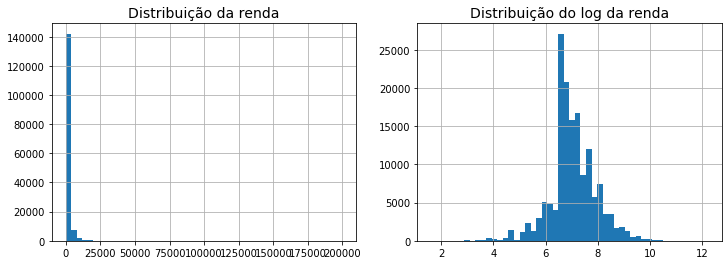

In [20]:
fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(12,4))
df_sel['renda'].hist(bins=50, ax=axes[0])
df_sel['renda'].apply(np.log).hist(bins=50, ax=axes[1])
axes[0].set_title('Distribuição da renda', fontsize=14)
axes[1].set_title('Distribuição do log da renda', fontsize=14)
pl.show()

In [131]:
def prop_grupo_renda(df, nome, tsd_renda, val2grupo):
    col_name = 'renda>{}'.format(tsd_renda)
    col_name2 = 'renda<={}'.format(tsd_renda)
    df_comp = df.loc[df['renda'] > tsd_renda, nome]\
                .value_counts()\
                .reset_index().set_index('index')\
                .join(df[nome].value_counts()\
                .reset_index().set_index('index')\
                .rename(columns={nome: 'total'}))
    df_comp[col_name] = 100 * df_comp[nome] / df_comp['total']
    df_comp[col_name2] = 100 - df_comp[col_name]
    df_comp = df_comp.reset_index()\
                     .rename(columns={nome: 'total_{}'.format(col_name),
                                      'index': 'grupo'})
    for val, grupo in val2grupo.items():
        df_comp.loc[df_comp['grupo'] == val, 'grupo'] = grupo
    return df_comp

Através de inspeções visuais selecionamos como threshold da renda RS2500. Com esse valor de threshold pelos gráficos abaixo percebemos uma disparidade grande entre grupos com relação a raça e o gênero. Para o caso da raça percebemos que enquanto que 22\% dos brancos e amarelos ganham acima de RS2500, apenas 9\% dos pretos, pardos e indígenas ganham acima de RS2500. Para o caso do gênero percebemos que enquanto que 17\% dos homens ganham acima de RS2500, apenas 12\% das mulheres ganham acima de RS2500.

In [22]:
tsd_renda = 2500

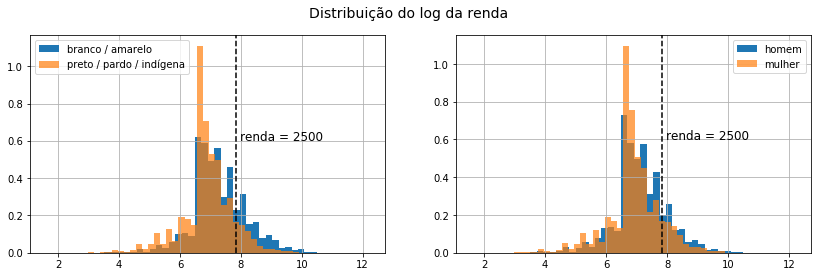

In [204]:
fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(14,4))
df_sel.loc[(df_sel['raca_bin'] == 1), 'renda']\
      .apply(np.log)\
      .hist(bins=50, density=True, label='branco / amarelo', ax=axes[0])
df_sel.loc[(df_sel['raca_bin'] == 0), 'renda']\
      .apply(np.log)\
      .hist(alpha=0.7, bins=50, density=True,  label='preto / pardo / indígena', ax=axes[0])
axes[0].axvline(np.log(tsd_renda), color='k', linestyle='--')
axes[0].text(np.log(tsd_renda)*1.02, 0.6, 
        'renda = {}'.format(tsd_renda), fontsize=12)
axes[0].legend()

df_sel.loc[(df_sel['genero'] == 2), 'renda']\
      .apply(np.log)\
      .hist(bins=50, density=True, label='homem', ax=axes[1])
df_sel.loc[(df_sel['genero'] == 4), 'renda']\
      .apply(np.log)\
      .hist(alpha=0.7, bins=50, density=True,  label='mulher', ax=axes[1])
axes[1].axvline(np.log(tsd_renda), color='k', linestyle='--')
axes[1].text(np.log(tsd_renda)*1.02, 0.6, 
        'renda = {}'.format(tsd_renda), fontsize=12)
axes[1].legend()

pl.suptitle('Distribuição do log da renda', fontsize=14)
pl.savefig('hist_renda_grupo.png', bbox_inches='tight', transparent=True)

In [133]:
nome = 'raca_bin'
val2grupo = {0: 'preto / pardo / indígena',
             1: 'branco / amarelo'}
df_raca = prop_grupo_renda(df_sel, nome, tsd_renda, val2grupo)
df_raca

,grupo,total_renda>2500,total,renda>2500,renda<=2500
0,branco / amarelo,14544,66042,22.022349,77.977651
1,preto / pardo / indígena,8128,86639,9.381456,90.618544


In [161]:
nome = 'genero'
val2grupo = {2: 'homem',
             4: 'mulher'}
df_gen = prop_grupo_renda(df_sel, nome, tsd_renda, val2grupo)
df_gen

,grupo,total_renda>2500,total,renda>2500,renda<=2500
0,homem,15153,89052,17.015901,82.984099
1,mulher,7519,63629,11.816939,88.183061


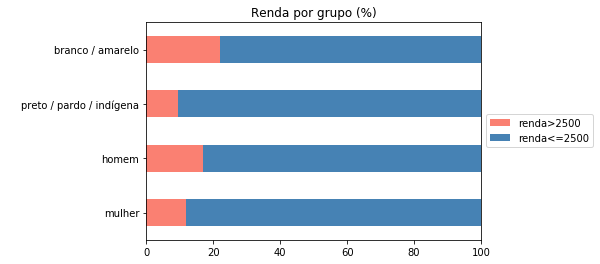

In [205]:
df_grupo = df_gen.sort_values(by='renda>2500').append(df_raca.sort_values(by='renda>2500'))
df_grupo.drop(['total_renda>2500', 'total'], axis=1, inplace=True)
# df_grupo = pd.pivot_table(df_grupo, columns='grupo').set_index('grupo')
df_grupo.set_index('grupo').plot.barh(stacked=True, color = ['salmon', 'steelblue'])
pl.xlim(0,100)
pl.legend(bbox_to_anchor=(1, 0.6))
pl.ylabel(' ')
pl.title('Renda por grupo (%)')
pl.savefig('bar_renda_grupo.png', bbox_inches='tight', transparent=True)

In [51]:
df_sel['renda_bin'] = 0
df_sel.loc[df_sel['renda'] > 2500, 'renda_bin'] = 1

## Análise da variável sensível

### Relação da variável sensível com as outras features

In [52]:
df_sel.head(2)

,UF,genero,idade,raca,estado_civil,anos_estudo,posicao_trabalho,faixa_horas_trab_sem,empreendimento_trabalho,ocupacao_trabalho,renda,raca_bin,renda_bin
0,11,2,23,8.0,0.0,12,4.0,3.0,11.0,5.0,800.0,0,0
1,11,4,23,2.0,5.0,12,1.0,3.0,12.0,4.0,1150.0,1,0


In [109]:
X = df_sel.drop(['renda', 'renda_bin', 'genero', 'raca', 'raca_bin'], axis=1)
y = df_sel['raca_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_raca = LogisticRegression(solver='lbfgs', multi_class='ovr')
model_raca.fit(X_train, y_train)
yp_train = model_raca.predict(X_train)
yp_test = model_raca.predict(X_test)
print('Acurácia treino: ', accuracy_score(y_train, yp_train))
print('Acurácia teste: ', accuracy_score(y_test, yp_test))

Acurácia treino:  0.654956444851978
Acurácia teste:  0.6578576808461866


In [110]:
pd.DataFrame({'nome': X.columns, 
              'feat_imp': model_raca.coef_[0]}).sort_values(by='feat_imp', ascending=False)

,nome,feat_imp
3,anos_estudo,0.081239
5,faixa_horas_trab_sem,0.050313
0,UF,0.047691
2,estado_civil,0.032178
1,idade,0.009995
4,posicao_trabalho,0.007358
6,empreendimento_trabalho,-0.027446
7,ocupacao_trabalho,-0.086312


In [111]:
X = df_sel.drop(['renda', 'renda_bin', 'genero', 'raca', 'raca_bin', 'UF'], axis=1)
y = df_sel['genero']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_gen = LogisticRegression(solver='lbfgs', multi_class='ovr')
model_gen.fit(X_train, y_train)
yp_train = model_gen.predict(X_train)
yp_test = model_gen.predict(X_test)
print('Acurácia treino: ', accuracy_score(y_train, yp_train))
print('Acurácia teste: ', accuracy_score(y_test, yp_test))

Acurácia treino:  0.6873935682473147
Acurácia teste:  0.6846448570586502


In [112]:
pd.DataFrame({'nome': X.columns, 
              'feat_imp': model_gen.coef_[0]}).sort_values(by='feat_imp', ascending=False)

,nome,feat_imp
5,empreendimento_trabalho,0.129479
3,posicao_trabalho,0.015374
2,anos_estudo,0.010625
0,idade,-0.001016
1,estado_civil,-0.006081
6,ocupacao_trabalho,-0.221204
4,faixa_horas_trab_sem,-0.353537


### Importância da feature sensível

In [122]:
X = df_sel.drop(['renda', 'renda_bin', 'genero', 'raca'], axis=1)
y = df_sel['renda_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)
print('Acurácia treino: ', accuracy_score(y_train, yp_train))
print('Acurácia teste: ', accuracy_score(y_test, yp_test))

Acurácia treino:  0.8942313990044538
Acurácia teste:  0.8963552411828274


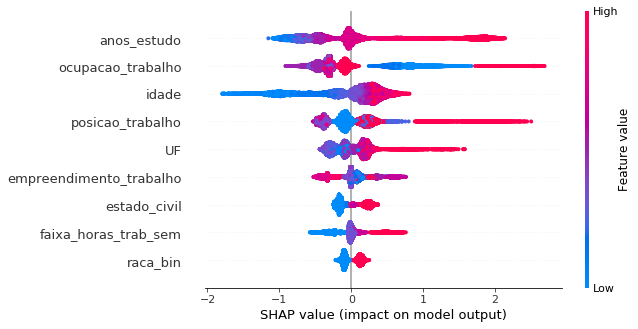

In [123]:
explainer = shap.TreeExplainer(model=model, data=X_train)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values,list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test, 
                  feature_names=X.columns)

In [124]:
X = df_sel.drop(['renda', 'renda_bin', 'raca_bin', 'raca'], axis=1)
y = df_sel['renda_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)
print('Acurácia treino: ', accuracy_score(y_train, yp_train))
print('Acurácia teste: ', accuracy_score(y_test, yp_test))

Acurácia treino:  0.8962617893633744
Acurácia teste:  0.8958967809542522


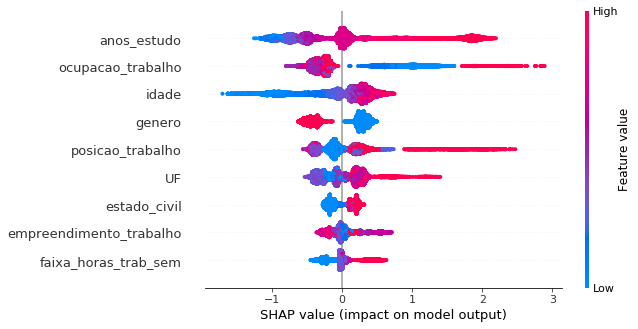

In [125]:
explainer = shap.TreeExplainer(model=model, data=X_train)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values,list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test, 
                  feature_names=X.columns)

## Salva dataframe

In [126]:
df_sel.to_csv('pnad_processado.csv', index=False)